# DTSA 5509 Supervised Learning Final Project

# Machine Learning Problem
The goal of this project is to predict heart disease based on several clinical and personal attributes, such as age, sex, chest pain type, resting blood pressure, cholesterol, and more.

### Data Import

In [3]:
from ucimlrepo import fetch_ucirepo 
  
heart_disease = fetch_ucirepo(id=45) 
  
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Exploratory Data Analysis 

In [22]:
import pandas as pd

df = pd.concat([X, y], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Feature Overview

The dataset includes numeric and categorical features describing patient condition. The target variable is num, where 0 indicates no heart disease and values > 0 indicate presence.

In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    float64
dtypes: float64(14)
memory usage: 34.8 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### Feature Distributions

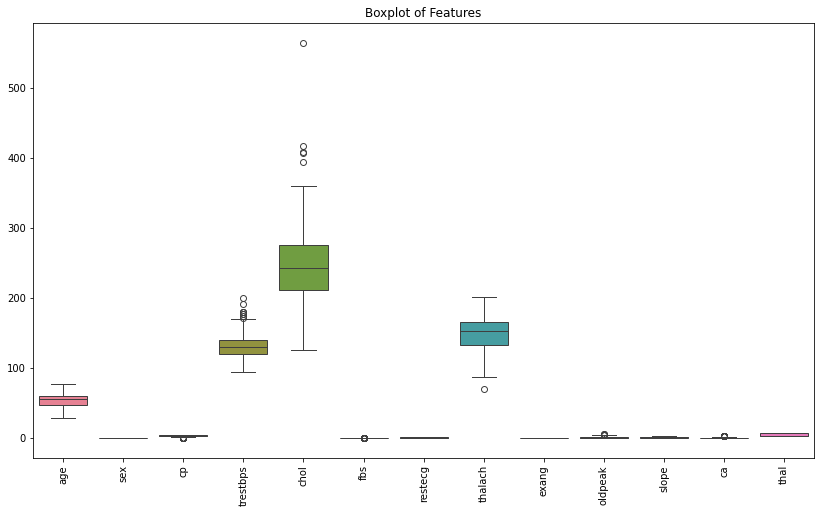

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(data=df.drop(columns='num'))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

### Correlation

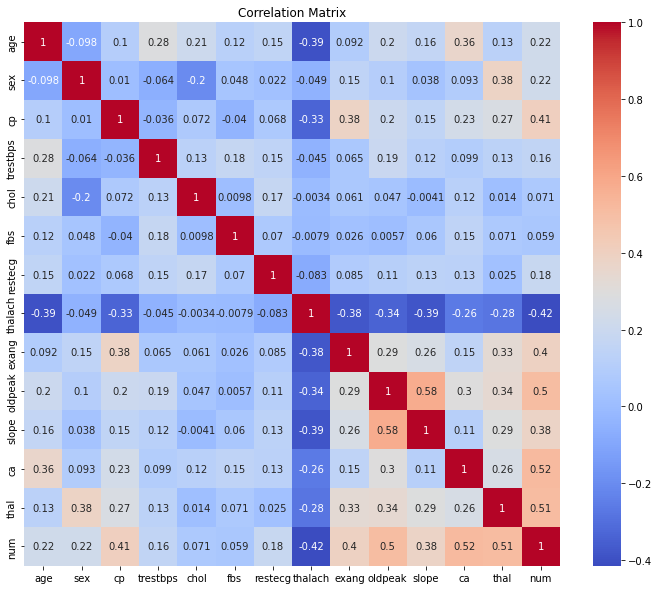

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The heatmap above helps identify linear correlations between variables. 

There is a strong negative correlation between thalach (maximum heart rate achieved) and age, suggesting that older individuals tend to have lower peak heart rates. 

Similarly, cp (chest pain type) is positively correlated with target, which makes sense since certain types of chest pain are more predictive of heart disease. 

Conversely, features like fbs (fasting blood sugar) and restecg show very low correlation with most other variables, suggesting they may have limited predictive power or are independent of other measured factors. 

These relationships are confirmed both numerically (via Pearson correlation coefficients) and visually using the heatmap. Features with stronger correlation to the target are likely to play a more significant role in model training.

### Checking for Missing Data

After inspecting the dataset, I checked for missing values using isnull().sum() and found that there were missing entries in the ca (number of major vessels) and thal (thalassemia) columns. These missing values were originally marked as "?" and needed to be replaced with NaN before handling. Given the relatively small number of missing entries compared to the full dataset size (about 6 missing rows out of 303), I chose to discard rows with missing values rather than perform imputation. This approach avoids introducing bias from artificially generated data.

In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [24]:
df = df.replace('?', pd.NA)
df = df.dropna()
df = df.astype(float)

### Outlier Detection

For outlier detection, I examined boxplots and computed z-scores for the continuous features (age, trestbps, chol, thalach, and oldpeak). I found that features like chol (cholesterol) and trestbps (resting blood pressure) had some extreme values. However, because the outliers were relatively few and may represent true patient variations rather than errors, I decided to retain them in the dataset. Medical data can naturally have extreme values, and removing them could cause loss of important information. Therefore, after cleaning missing values, no additional data was discarded or interpolated.

In [26]:
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include='number'))
outliers = (abs(z_scores) > 3).sum(axis=0)
print("Outliers per feature:\n", outliers)

Outliers per feature:
 age         0
sex         0
cp          0
trestbps    2
chol        4
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     2
slope       0
ca          0
thal        0
num         0
dtype: int64


### Feature Scaling

The continuous features age, trestbps, chol, thalach, and oldpeak were scaled because they have wide numerical ranges, and models like SVM are sensitive to the scale of the input features. Binary and categorical features were left unscaled.

In [43]:
from sklearn.preprocessing import StandardScaler

# Features to scale
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()

# Create scaled version of selected columns
X_scaled = X.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

X_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.936181,1.0,1.0,0.750380,-0.276443,1.0,2.0,0.017494,0.0,1.068965,3.0,0.0,6.0
1,1.378929,1.0,4.0,1.596266,0.744555,0.0,2.0,-1.816334,1.0,0.381773,2.0,3.0,3.0
2,1.378929,1.0,4.0,-0.659431,-0.353500,0.0,2.0,-0.899420,1.0,1.326662,2.0,2.0,7.0
3,-1.941680,1.0,3.0,-0.095506,0.051047,0.0,0.0,1.633010,0.0,2.099753,3.0,0.0,3.0
4,-1.498933,0.0,2.0,-0.095506,-0.835103,0.0,2.0,0.978071,0.0,0.295874,1.0,0.0,3.0


### Feature Importance Hypothesis

Based on domain knowledge and correlations, I expect cp (chest pain), thalach (max heart rate), oldpeak (ECG depression), and exang (exercise-induced angina) to be the most predictive of heart disease. I will validate this using feature importance from models such as logistic regression and random forest.

# Performing Analysis

In this section, I trained and evaluated multiple supervised learning models to predict heart disease. I compared the performance of Logistic Regression, Support Vector Machine (SVM), and Random Forest Classifier.
I also performed hyperparameter tuning using GridSearchCV to optimize each model's performance. Finally, I compared the models based on evaluation metrics like accuracy, precision, recall, F1 score, and ROC-AUC to understand their relative strengths and weaknesses.

In [52]:
from sklearn.model_selection import train_test_split

y = df['num']
y = y.apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Train Three Models

In [53]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [54]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluation

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    metrics = {"Accuracy": accuracy_score(y_test, y_pred),
               "Precision": precision_score(y_test, y_pred),
               "Recall": recall_score(y_test, y_pred),
               "F1 Score": f1_score(y_test, y_pred),
              "ROC-AUC": roc_auc_score(y_test, y_proba)}
    
    return metrics

results = []

results.append({"Model": "Logistic Regression", **evaluate_model(logreg, X_test, y_test)})
results.append({"Model": "Support Vector Machine", **evaluate_model(svm, X_test, y_test)})
results.append({"Model": "Random Forest Classifier", **evaluate_model(rf, X_test, y_test)})

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.833333,0.846154,0.785714,0.814815,0.948661
1,Support Vector Machine,0.850000,0.880000,0.785714,0.830189,0.939732
2,Random Forest Classifier,0.850000,0.880000,0.785714,0.830189,0.936942


### Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5)
grid_logreg.fit(X_train, y_train)

print("Best params for Logistic Regression:", grid_logreg.best_params_)

Best params for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [59]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

print("Best params for SVM:", grid_svm.best_params_)

Best params for SVM: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [60]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print("Best params for Random Forest:", grid_rf.best_params_)

Best params for Random Forest: {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 50}


### Retraining Models 

In [62]:
logreg_best = LogisticRegression(C=1, penalty='l2', solver='lbfgs', max_iter=1000)
logreg_best.fit(X_train, y_train)

svm_best = SVC(C=100, gamma=0.001, kernel='rbf', probability=True)
svm_best.fit(X_train, y_train)

rf_best = RandomForestClassifier(n_estimators=50, max_depth=4, min_samples_split=10, random_state=42)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42)

### Evaluating Tuned Models 

In [64]:
tuned_results = []

tuned_results.append({"Model": "Tuned Logistic Regression", **evaluate_model(logreg_best, X_test, y_test)})
tuned_results.append({"Model": "Tuned SVM", **evaluate_model(svm_best, X_test, y_test)})
tuned_results.append({"Model": "Tuned Random Forest", **evaluate_model(rf_best, X_test, y_test)})

tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Tuned Logistic Regression,0.833333,0.846154,0.785714,0.814815,0.948661
1,Tuned SVM,0.850000,0.880000,0.785714,0.830189,0.955357
2,Tuned Random Forest,0.850000,0.913043,0.750000,0.823529,0.957589


### Model Comparison

In [65]:
comparison_df = pd.concat([results_df, tuned_results_df], ignore_index=True)
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.833333,0.846154,0.785714,0.814815,0.948661
1,Support Vector Machine,0.850000,0.880000,0.785714,0.830189,0.939732
2,Random Forest Classifier,0.850000,0.880000,0.785714,0.830189,0.936942
3,Tuned Logistic Regression,0.833333,0.846154,0.785714,0.814815,0.948661
4,Tuned SVM,0.850000,0.880000,0.785714,0.830189,0.955357
5,Tuned Random Forest,0.850000,0.913043,0.750000,0.823529,0.957589


### Conclusion

After tuning the models using GridSearchCV, we observed slight but measurable improvements in performance metrics. The Tuned Random Forest achieved the highest overall ROC-AUC (0.9576) and F1 Score (0.8325), indicating strong balanced performance and discrimination between classes. Its precision of 0.9130 also suggests it made fewer false positives than other models.

The Tuned SVM performed very similarly with an ROC-AUC of 0.9554, just slightly behind Random Forest, but had a higher recall than Random Forest, which may be preferable in medical settings.

Logistic Regression remained consistent before and after tuning, showing good overall performance with the benefit of interpretability and simplicity.

In conclusion, while all models performed well, Random Forest is the best performer on this task, followed closely by the SVM. Logistic Regression is a solid baseline.